In [3]:
import rasterio
from rasterio.transform import from_origin
import numpy as np
import cv2
from starfm import prediction
import matplotlib.pyplot as plt

In [4]:
F0 = cv2.imread("../Images/sim_Landsat_t1.tif")
C0 = cv2.imread("../Images/sim_MODIS_t1.tif")
C1 = cv2.imread("../Images/sim_MODIS_t2.tif")

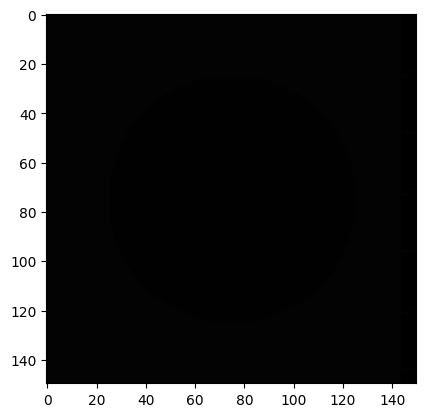

In [22]:
plt.imshow(F0, cmap='gray')
plt.show()

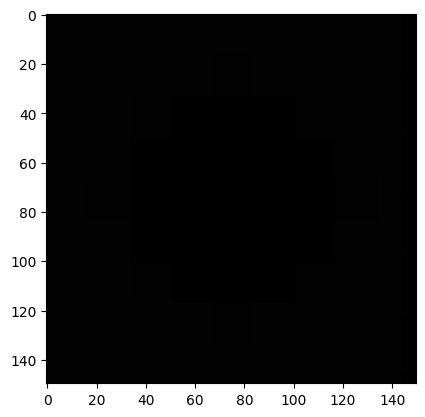

In [23]:
plt.imshow(C0, cmap='gray')
plt.show()

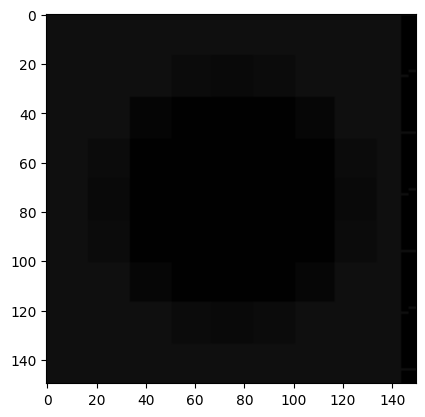

In [25]:
plt.imshow(C1, cmap='gray')
plt.show()

In [26]:
F1 = prediction(F0, C0, C1)

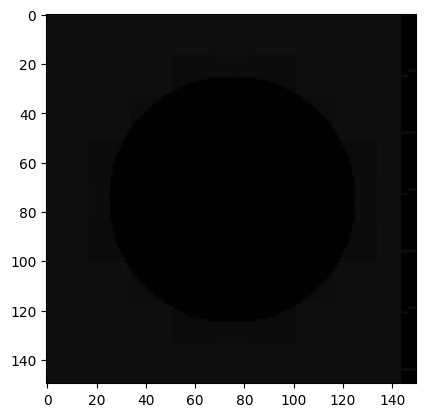

In [27]:
plt.imshow(F1, cmap='gray')
plt.show()

In [34]:
output_file = "../results/output.tif"

In [35]:
xmin, ymax = 0, 0
xres, yres = 1, 1
nrows, ncols, nbands = F1.shape
transform = from_origin(xmin, ymax, xres, yres)

In [36]:
with rasterio.open(output_file, 'w', driver='GTiff', height=nrows, width=ncols, count=nbands, dtype=F1.dtype, transform=transform) as dst:
    # Write the NumPy array to the file
    for i in range(nbands):
        dst.write(F1[:,:,i], indexes=i+1)

/Users/shubhrosesingh/Library/Caches/pypoetry/virtualenvs/mystarfm-sxmhv0iY-py3.10/lib/python3.10/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [15]:
Test = cv2.imread("../results/prediction.tif")

[ WARN:0@1577.808] global grfmt_tiff.cpp:716 readData OpenCV TIFF: TIFFRGBAImageOK: Sorry, can not handle images with 64-bit samples


In [16]:
print(Test.shape)

AttributeError: 'NoneType' object has no attribute 'shape'